# Method of Continuous variation

### In this method cation and anion solutions with identical concentraions are mixed in such a way that total moles of reactants are constant but the mole ratio of them varies continuously.
### Then the absorbance of each solution is measured and corrected for any absorbance the mixture have if no reaction had occured.
### Finaly a curve was fitted to the data(in this case a 2nd order curve). the curvature of the expriment data is a result of incomplete formation of the complex and an equilibrium reaction. So the tangent lines at the point of decay(or raise in case of the reverse reaction) shows what would happen if the reaction proceeded to compeletion.
### the maximum(estimated) of absorbance is the point were the highest amount of complex is formed and it was rounded to 0.5 meaning at this mole ratio which indicates a 1:1 cation-anion ration, thus the formula of the complex is ML.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## importing data

In [2]:
x = np.linspace(0, 1, 6)
A = np.array([0.00118, 0.540359, 0.746505, 0.728399, 0.396838, 0.006202])

df = pd.DataFrame({
    'mole fraction of ligand': x,
    'Absorbance': A,
})

df

,mole fraction of ligand,Absorbance
0,0.0,0.001180
1,0.2,0.540359
2,0.4,0.746505
3,0.6,0.728399
4,0.8,0.396838
5,1.0,0.006202


## Plotting raw data

Text(0, 0.5, 'A')

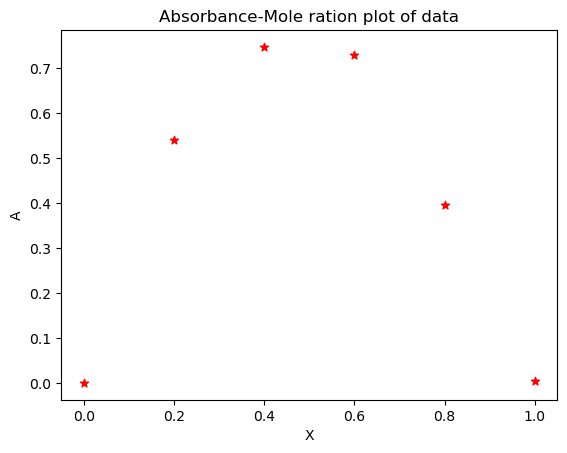

In [3]:
plt.scatter(x, A, marker='*', color='r')
plt.title('Absorbance-Mole ration plot of data')
plt.xlabel('X')
plt.ylabel('A')

## Fitting a 2nd order curve to the plot

C:\ProgramData\anaconda3\envs\myenv\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Text(0.5, 1.0, '2nd order fit to the data')

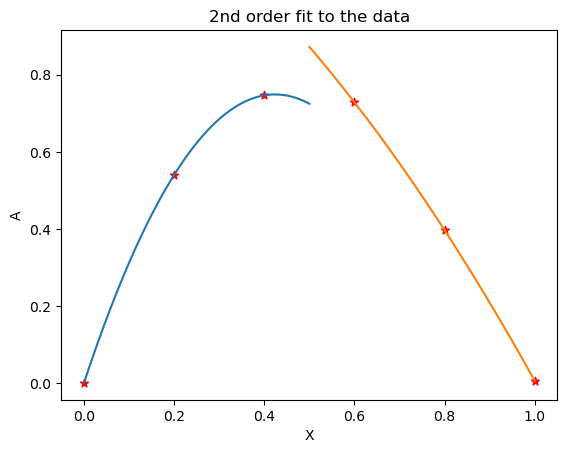

In [4]:
fig, ax= plt.subplots()

f = lambda x,A,B,C: A* (x**2) + B*x + C

p1, co1= curve_fit(f, x[:3], A[:3])
fit1 = lambda x: f(x, p1[0], p1[1], p1[2])

p2, co2= curve_fit(f, x[3:], A[3:])
fit2 = lambda x: f(x, p2[0], p2[1], p2[2])

myx1 = np.linspace(0, 0.5, 10000)
myx2 = np.linspace(0.5, 1, 10000)

ax.scatter(x, A, marker='*', color='r')
ax.plot(myx1, fit1(myx1))
ax.plot(myx2, fit2(myx2))

ax.set_xlabel('X')
ax.set_ylabel('A')
ax.set_title('2nd order fit to the data')

## Finding tangent lines

In [5]:
import sympy as sy

In [6]:
u = sy.symbols('x')

dfit1 = sy.diff(fit1(u), u)
dfit2 = sy.diff(fit2(u), u)

# print(f'dfit1 = {dfit1}\ndfit2 = {dfit2}')

In [7]:
slope1 = sy.lambdify((u), dfit1, 'numpy')
slope2 = sy.lambdify((u), dfit2, 'numpy')

Text(0.5, 1.0, 'Adding tangent lines to the curves')

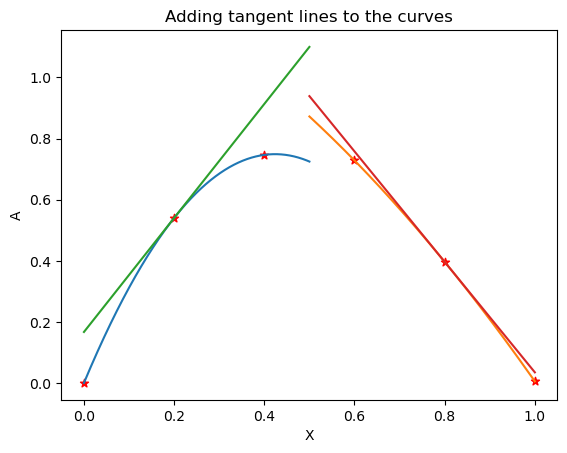

In [8]:
fig, ax= plt.subplots()

ax.scatter(x, A, marker='*', color='r')
ax.plot(myx1, fit1(myx1))
ax.plot(myx2, fit2(myx2))
ax.plot(myx1, slope1(0.2) * myx1 + 0.16769649999999997)
ax.plot(myx2, slope2(0.8) * myx2 + 1.841231999999999)

ax.set_xlabel('X')
ax.set_ylabel('A')
ax.set_title('Adding tangent lines to the curves')

## Interpolating lines to get the intercept point

Text(0.5, 1.0, 'Continuous-varitation plot for the 1:1 complex ML')

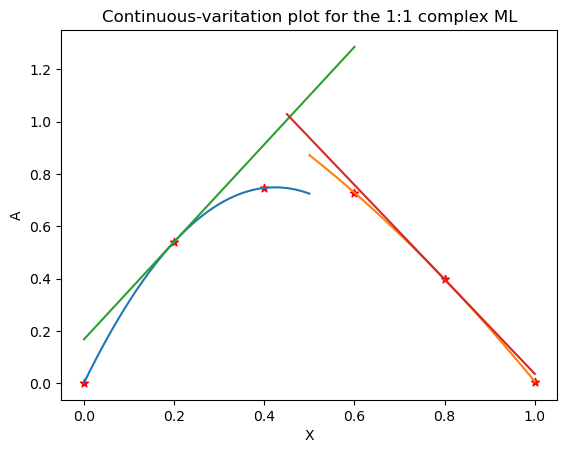

In [9]:
fig, ax= plt.subplots()

myx11 = np.arange(0, 0.6, 5e-05)
myx22 = np.arange(0.45, 1, 5e-05)

ax.scatter(x, A, marker='*', color='r')
ax.plot(myx1, fit1(myx1))
ax.plot(myx2, fit2(myx2))
ax.plot(myx11, slope1(0.2) * myx11 + 0.16769649999999997)
ax.plot(myx22, slope2(0.8) * myx22 + 1.841231999999999)

ax.set_xlabel('X')
ax.set_ylabel('A')
ax.set_title('Continuous-varitation plot for the 1:1 complex ML')

# fig.savefig('job.png')

In [10]:
intercept = (1.841231999999999-0.16769649999999997) / (slope1(0.2) - slope2(0.8))
print(f'intercept point is {intercept} == 0.5')

intercept point is 0.45615275273556366 == 0.5


### given that in x = 0.5 we see the strongest signal, the formula of the complex is ML